# Kapittel 9

In [1]:
# Importerar bibliotek
import sys
import random
import numpy as np
import matplotlib.pyplot as plt

In [4]:
"""Implementering som reknar ut ein sum av 
areal av rektangel.
"""

# Talet på rektangel
n = int(input('Kor mange rektangel? '))

def funk(x):
    """Funksjonen"""
    return x**3

# Grenser
a = 1
b = 3

# Bestemmer h og initierer summen V
h = (b-a)/n
V = 0

for i in range(0, n):
    xi = a+i*h              # Oppdaterer x
    V = V+h*funk(xi)        # Oppdaterer V

# Skriv summen V til skjerm
print(f'V = {V:.4f}')

Kor mange rektangel?  4


V = 14.0000


In [5]:
"""Implementering som estimerer eit integral på tre måtar:
Venstre og høgre Riemann-sum og trapesmetoden.
"""

# Talet på rektangel
n = int(input('Kor mange rektangel? '))

def funk(x):
    """Funksjonen"""
    return x**3

# Grenser
a = 1
b = 3

# Bestemmer h og initierer summane V og H
h = (b-a)/n
V = 0
H = 0

# Reknar ut venstresummen
for i in range(0, n):
    xi = a+i*h
    V = V+h*funk(xi)

# Reknar ut høgresummen
for i in range(1, n+1):
    xi = a+i*h
    H = H+h*funk(xi)

# Skriv summane V, H og T til skjerm
print(f'V = {V:.4f}')
print(f'H = {H:.4f}')
T=(V+H)/2            # Trapessummen
print(f'T = {T:.4f}')

Kor mange rektangel?  4


V = 14.0000
H = 27.0000
T = 20.5000


In [6]:
"""Implementering av trapesmetoden for numerisk
integrasjon. Integrasjonsgrensene a og b, oppdelinga n 
og integranden, funk, blir gitt heilt i toppen av 
implementeringa. For å gi n brukar vi input-funksjonen.
"""

# Nøyaktig integral
integral = 2/7

# Integrasjonsgrenser
a = -1
b = 1

def funk(x):
    """Integranden"""
    return x**6

# Oppdeling
n = int(input('Gi oppdelinga n: '))

h = (b-a)/n                  # Steglengda

# Bidrag frå endane
T = h/2*(funk(a)+funk(b))

# Resten av bidraga
for i in range(1, n):
    xi = a+i*h
    T = T+h*funk(xi)

# Skriv svaret til skjerm
print(f'T = {T:.4f}')

# Finn feilen og skriv til skjerm
feil = abs(T - integral)
print(f'feil = {feil:.4e}')

Gi oppdelinga n:  10


T = 0.3252
feil = 3.9470e-02


In [8]:
def riemann_funk_V(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral
    
    som ein Riemann-sum på ein regulær partisjon med venstre-
    seleksjon.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen:
    R = 0
    
    # Reknar ut summen
    for n in range(1, N+1):
        x = a+(n-1)*delta_x             # Oppdaterar x
        R = R+delta_x*funk(x)           # Oppdaterar summen

    return R

def trapes_funk(funk, a, b, N):
    """Implementering av trapesmetoden for numerisk integrasjon.
    
    Integranden funk, grensene a og b, og oppdelinga N
    blir gitt som input.
    """
    
    # Steglengda
    h = (b-a)/N
    
    # Bidrag frå endane
    T = h/2*(funk(a)+funk(b))
    
    # Resten av bidraga
    for i in range(1, n):
        xi = a+i*h
        T = T+h*funk(xi)

    return T

def simpsons_funk(funk, a, b, N):
    """Funksjonsfil som estimerar eit integral 
    ved hjelp av Simpsons metode.
    Integranden og grenser er hard-koda, input er
    N, talet på del-intervall.
    """
    
    # Oppdeling
    delta_x = (b-a)/N
    
    # Initerar summen og tar med endane:
    S = (funk(a)+funk(b))
    
    # Oddetalsbidrag
    for n in range(1, N, 2):
        x = a+n*delta_x           # Oppdaterar x
        S = S+4*funk(x)           # Oppdaterar summen
    
    # Partalssbidrag
    for n in range(2, N-1, 2):
        x = a+n*delta_x           # Oppdaterar x
        S = S+2*funk(x)           # Oppdaterar summen
    
    # Korrigerar svar med delta_x/3
    S = S*delta_x/3
    
    return S

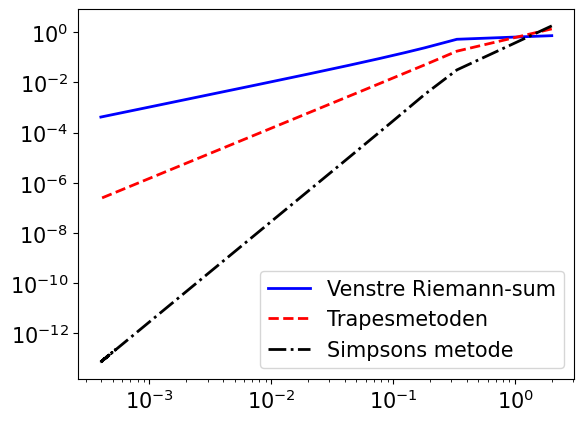

In [9]:
"""Implementering som plottar feilen i eit estimat
for ein Riemann-sum, trapesmetoden og Simpsons metode.
"""

def funk(x):
    """Integrand"""
    return x*np.sin(x**2)

a = -1
b = 3
fasit = (np.cos(1)-np.cos(9))/2

# Lagar vektor med n-verdiar
n_start = 2
n_steg = 10
n_slutt = 10000
n_vektor = np.arange(n_start, n_slutt+1, n_steg)
h_vektor = (b-a)/n_vektor

V_vektor = np.zeros_like(h_vektor)
T_vektor = np.zeros_like(h_vektor)
S_vektor = np.zeros_like(h_vektor)

# Lagar vektorar med estimat
indeks = 0
for n in n_vektor:
    V_vektor[indeks] = riemann_funk_V(funk, a, b, n)
    T_vektor[indeks] = trapes_funk(funk, a, b, n)
    S_vektor[indeks] = simpsons_funk(funk, a, b, n)
    indeks = indeks+1

# Plottar feilen
plt.rcParams.update({'font.size': 15})
plt.loglog(h_vektor, abs(V_vektor-fasit), 'b-', linewidth=2, 
           label='Venstre Riemann-sum')
plt.loglog(h_vektor, abs(T_vektor-fasit), 'r--', linewidth=2,
           label='Trapesmetoden')
plt.loglog(h_vektor, abs(S_vektor-fasit), 'k-.', linewidth=2,
           label='Simpsons metode')

plt.legend(loc='lower right')
plt.show()

In [2]:
#Brukar ein tilfeldig tal generator go sett "seed"-verdi 
#for å kunne gjenskape plott og resultat i boka. 
#NB: Ikkje ha med seed til vanlig!
# Fra NP doc: "New code should use the random method of a Generator instance instead; please see the Quick start."
tilfeldig = np.random.default_rng(seed=1000)

a = -1
b = 3
r = a+(b-a)*tilfeldig.random()
print(f'r = {r:.4f}')

r = 1.0855


In [26]:
a = -1
b = 3
r = a+(b-a)*np.random.rand()
print(f'r = {r:.4f}')

r = 1.5909


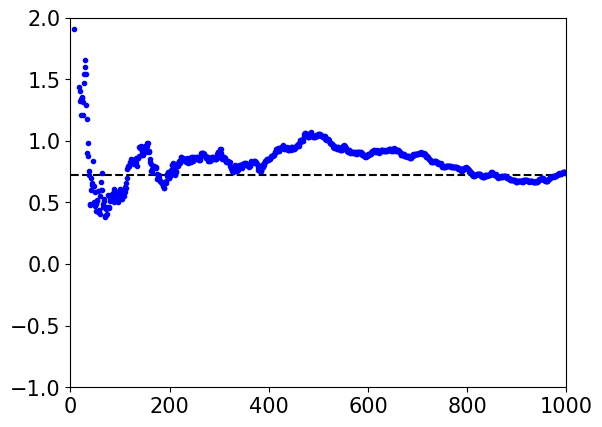

estimat = 0.7370


In [11]:
"""Implementeringa estimerer eit integral ved 
Monte Carlo-metoden.
Sjølve integralet, og den analytiske løysninga 
av det, er spesifisert i starten av koden - i 
tillegg til det maksimale talet på trekk.
"""

# Importerer bibliotek
import numpy as np
import matplotlib.pyplot as plt

# Integrasjonsgrenser
a = -1
b = 3

def funk(x):
    """Integrand"""
    return x * np.sin(x**2)

# Kjent analytisk svar:
fasit = (np.cos(1)-np.cos(9))/2

# Maksimalt tal på trekk:
n_max = 1000

# Initierer summen
MC_sum = 0

# Lagar ein "generator" for tilfeldige tal tilfeldig = np.random.default_rng() - se de to cellene over
# I denne koden refereres det til feil linjer i boka

# Lagar klart plott for estimata - saman med eksakt svar
plt.hlines(fasit, 1, n_max, 'k', linestyles = '--')

# Vi utfører uttrekka og legg til summen for kvar gong
for n in range(1, n_max+1):
    x = a+(b-a)*tilfeldig.random()
    MC_sum = MC_sum+funk(x)
    estimat = (b-a)*MC_sum/n         # Integral-estimat
    plt.plot(n, estimat, 'b.')       # Plottar estimat

plt.xlim(0, n_max)
plt.ylim(-1, 2)
plt.show()

# Skriv svaret til skjerm
print(f'estimat = {estimat:.4f}')